# Notes:

## What is t-SNE?

"t-SNE (t-distributed stochastic neighbor embedding) is a popular dimensionality reduction technique. We often havedata where samples are characterized by n features. To reduce the dimensionality, t-SNE generates a lower number of features (typically two) that preserves the relationship between samples as good as possible." (https://danielmuellerkomorowska.com/2021/01/05/introduction-to-t-sne-in-python-with-scikit-learn/)

## Why am I using t-SNE?

The t-SNE plots the spectra in 2-D space and then we use gaussian mixture to label and separate them. Once we have the groups sorted out using t-sne and gaussian mixture we then want to study the high-z sample further since this sample is the one that is most easily confused with noise. We want to use the high-z from the code and use that as a testing sample for your classifier that will go a step further and separate high-z and noise. All that is to say that doing this method gives us a testing sample to test your noise classifier. Once you have a good sample of high-z sources we then want to work on getting the noise classifier up and running. So for this we would want to select high-SN high-z sources lets go with SN > 6 and a high plya, say plya > .95, these will be our “True” high-z sources and then we can use the noise sample you generated to then separate these two groups. I believe you mentioned random forrest could be good with this so we can look in to how to do that.

# ADDED 2/7/23

## So what does this code do for me?

Basically it'll take a bunch of random sources and separate all of them out into groups. I want the high-z group for training purposes! These are my random high-z sources

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
#from astropy.table import Table
from astropy.io import fits
%matplotlib notebook

3645 start point
5475 end point
r band histogram

# After wavelength cut

In [3]:
encoded = np.load(f"encoded_nick_test.npy")
val_encoded = np.load(f"encoded_val_nick_test.npy")
#encoded_final = np.load(f"encoded_final_final_z3.npy")

In [4]:
len(val_encoded)

325

## Research sample

In [5]:
tsne = manifold.TSNE(n_components=2, init='random',
                     random_state=10, perplexity=10, n_iter=3000) #n_jobs=-1)

#arr = np.concatenate((encoded,encoded_final))
X = tsne.fit_transform(encoded)

/opt/conda/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [6]:
X = (X-np.min(X))/(np.max(X)-np.min(X))
np.save("final_tsne_z3.npy",X)

<IPython.core.display.Javascript object>


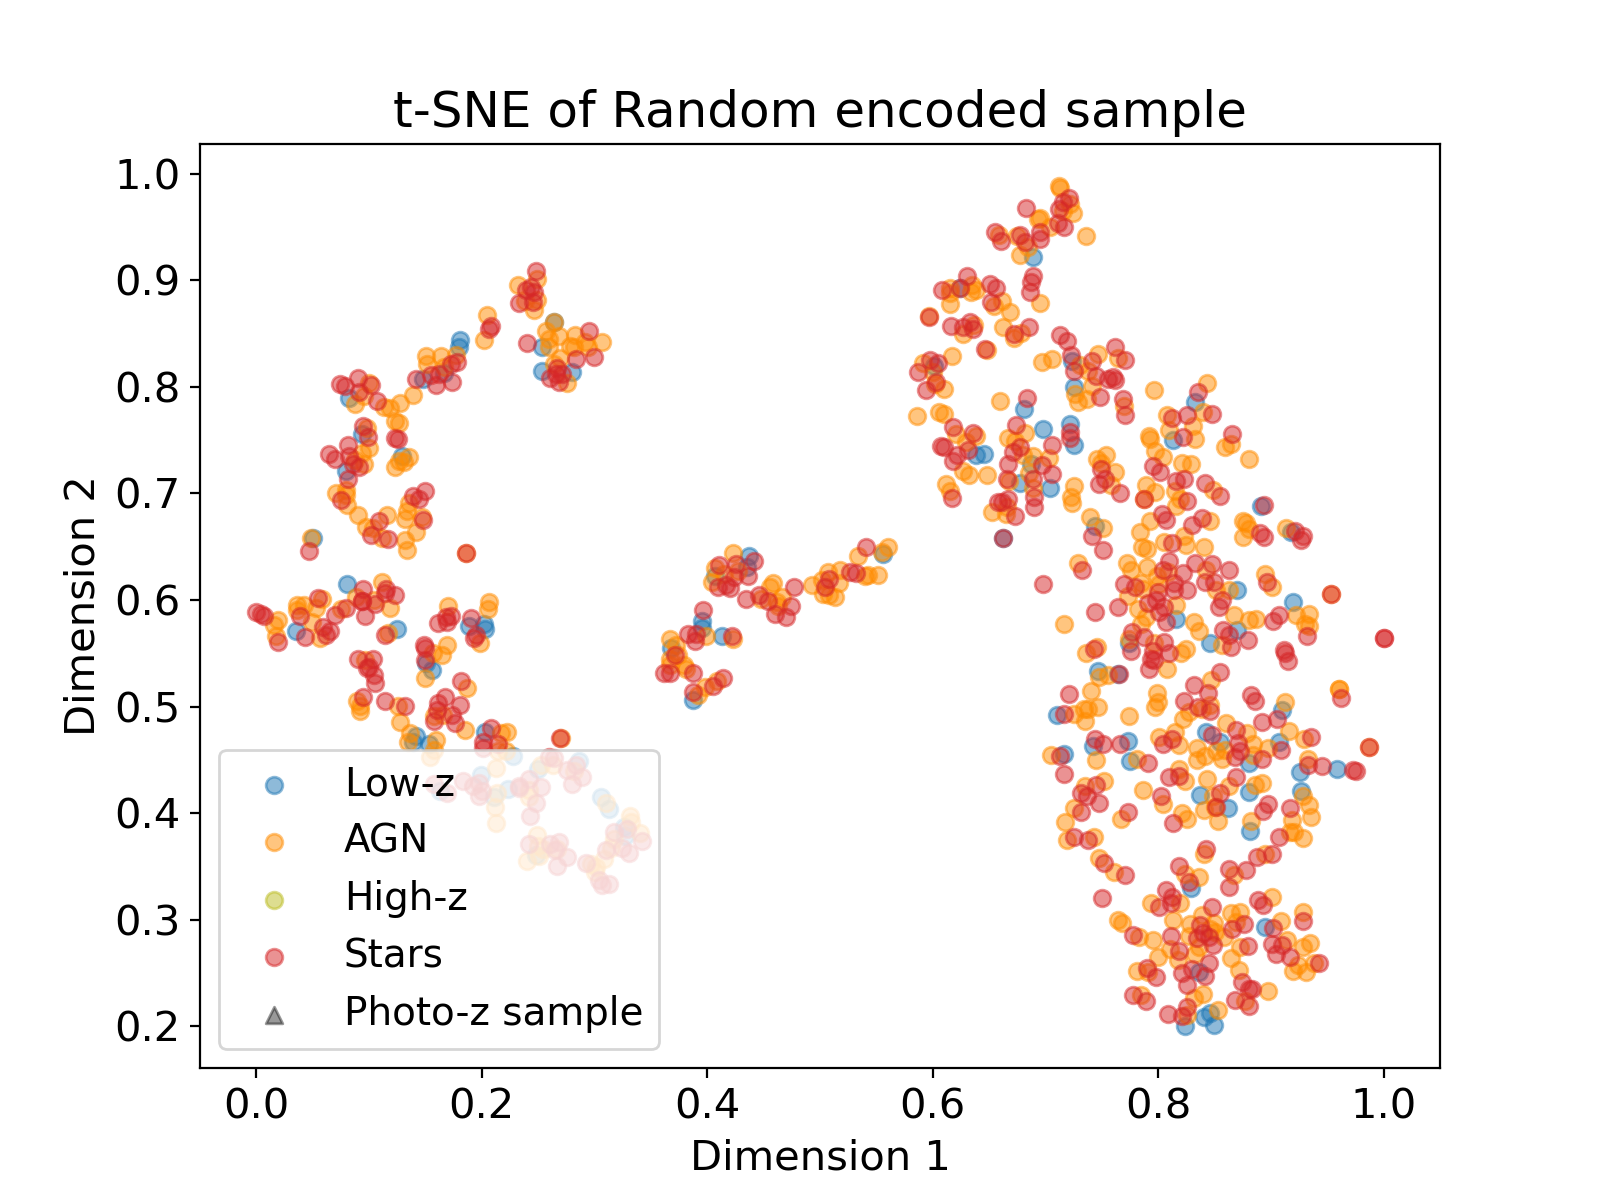

Text(0, 0.5, 'Dimension 2')

In [7]:
X = np.load("final_tsne_z3.npy")

plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(8,6))
plt.scatter(X[433+444:433+444+837,0],X[433+444:433+444+837,1], label="Low-z",color="tab:blue",alpha=0.5)
plt.scatter(X[433:433+444,0],X[433:433+444,1],label="AGN",color="darkorange",alpha=0.5)
plt.scatter(X[433+444+837:433+444+837+254,0],X[433+444+837:433+444+837+254,1], label="High-z",color="tab:olive",alpha=0.5)
plt.scatter(X[:433,0],X[:433,1],label="Stars",color="tab:red",alpha=0.5)
plt.scatter(X[433+444+837+254:,0],X[433+444+837+254:,1], label="Photo-z sample",marker="^",color="black",alpha=0.4)
plt.legend(prop={'size': 14},loc="lower left")
plt.title("t-SNE of Random encoded sample")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
#plt.savefig("tsne_labeled_axes.png")

# Notes pt 2.

From here we get a plot with different clusters. I want the green dots because they are high-z and I ultimately want to train my ML algorithm to differentiate between high-z and noise! The code below gets the high-z spectra and saves it to a file

<IPython.core.display.Javascript object>


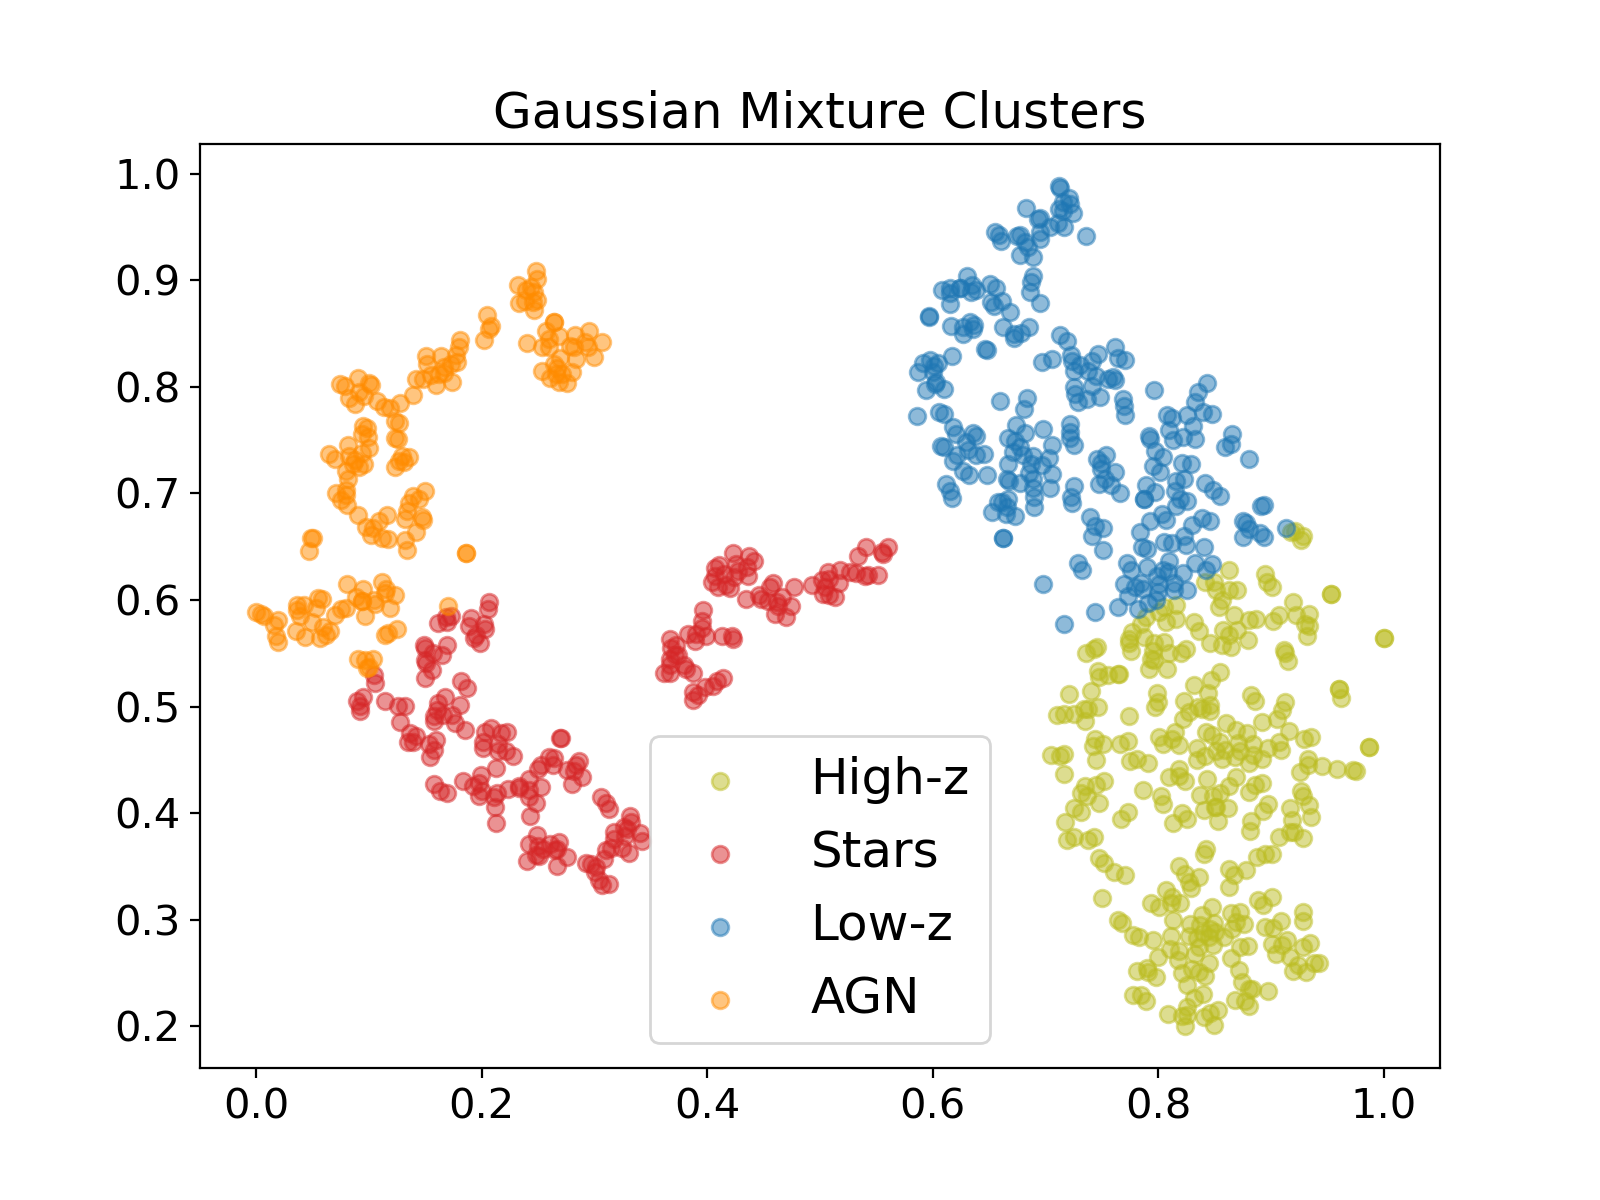

In [20]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=4,random_state=1)

model.fit(X)

yhat = model.predict(X)

clusters = np.unique(yhat)

plt.figure(figsize=(8,6))

plt.title("Gaussian Mixture Clusters")

for cluster in clusters:
    row_ix = np.where(yhat == cluster)
    if cluster == 0:
        #print('highz row_ix', row_ix)
        # highz_idx will take row_ix for cluster == 0 which is the High-z spectra
        highz_idx = row_ix
        plt.scatter(X[row_ix, 0], X[row_ix, 1],color = "tab:olive",alpha = 0.5,label="High-z")
    if cluster == 1:
        plt.scatter(X[row_ix, 0], X[row_ix, 1],color = "tab:red",alpha = 0.5,label="Stars")
    if cluster == 2:
        plt.scatter(X[row_ix, 0], X[row_ix, 1],color = "tab:blue",alpha = 0.5,label="Low-z")
    if cluster == 3:
        plt.scatter(X[row_ix, 0], X[row_ix, 1],color = "darkorange",alpha = 0.5,label="AGN")

plt.legend(prop={'size': 18})
plt.savefig("clustersz3.png")


In [10]:
# Indeces of the spectra with in high-z cluster
highz_idx

(array([  5,   6,   7,  15,  16,  19,  25,  32,  37,  38,  40,  42,  47,
         52,  54,  60,  62,  68,  72,  75,  80,  83,  84,  86,  87,  90,
         91,  95,  98, 100, 101, 107, 108, 111, 112, 114, 116, 119, 122,
        127, 128, 129, 130, 142, 148, 149, 153, 155, 156, 157, 159, 164,
        165, 166, 170, 172, 174, 175, 185, 187, 195, 201, 207, 210, 216,
        220, 221, 222, 223, 224, 232, 233, 234, 235, 238, 239, 243, 248,
        253, 256, 259, 260, 261, 270, 273, 274, 275, 279, 280, 282, 283,
        285, 287, 289, 291, 292, 296, 297, 298, 299, 301, 302, 304, 307,
        311, 317, 327, 337, 339, 340, 341, 345, 346, 348, 350, 351, 354,
        357, 367, 369, 370, 379, 385, 387, 390, 392, 393, 396, 397, 398,
        399, 401, 405, 409, 411, 415, 416, 419, 420, 422, 424, 431, 434,
        448, 455, 461, 462, 464, 466, 473, 474, 478, 479, 481, 488, 492,
        495, 503, 506, 512, 513, 515, 516, 518, 521, 523, 524, 527, 538,
        540, 541, 543, 545, 549, 556, 557, 561, 564

In [11]:
# Make a 2D list the size of the index array
# will later populate with the spectras themselves
highz_ls = [[0] * 1 for i in range(highz_idx[0].size)]

In [12]:
# populate list with the encoded spectra for the highz indeces
# had to do the [0] because the original highz_idx was a tuple for some reason
for i in range(highz_idx[0].size):
    highz_ls[i] = encoded[highz_idx[0][i]]

In [13]:
highz_ls

[array([-6.166118  , -3.714489  ,  1.7042812 , -1.9732864 ,  5.7955303 ,
        -2.0433555 , -8.74192   ,  2.9994586 , -4.617688  , -3.7348151 ,
        -7.705137  ,  3.518152  ,  3.5778859 ,  4.309358  , -4.552003  ,
        -0.1778309 ,  1.7290344 , -4.2945886 ,  6.1800895 ,  0.94971466,
         6.527111  ,  3.6291442 ,  5.4140778 ,  4.226511  , -2.8040433 ,
         3.723738  ,  5.3009043 ,  8.416723  , -6.0077114 , -4.75335   ],
       dtype=float32),
 array([ -6.706644  ,  -3.4531047 ,   5.121396  ,  -0.78745073,
          9.1415825 ,   7.353968  ,  -9.181689  ,   5.5225577 ,
         -5.1858315 ,  -8.490474  ,  -8.224508  ,  12.540871  ,
          7.0155272 ,   3.5398448 , -11.681471  ,   7.472141  ,
         -3.9882834 ,  -3.6631572 ,   8.806463  ,  -3.2886934 ,
         15.103182  ,   5.6582756 ,  10.255099  ,   9.709728  ,
         -7.7307053 ,   4.876343  ,   9.860544  ,  13.839592  ,
         -1.0710316 ,  -6.5557275 ], dtype=float32),
 array([ -8.605592  ,   1.9020662 ,  

In [14]:
# Turning the list of spectra into an array
highz_arr = np.array(highz_ls)

In [15]:
highz_arr.shape

(321, 30)

In [16]:
highz_arr[320]

array([ -0.39773577,  -5.4796314 ,   8.477837  ,   3.1018195 ,
         4.6641617 ,   0.7357944 ,  -7.950094  ,  14.425195  ,
        -2.5286498 , -13.664638  ,  -1.301032  ,  11.626475  ,
        10.337729  ,  14.132702  , -10.0080385 ,   1.4737513 ,
         6.3771486 ,  -6.275785  ,   8.583303  ,  -6.2528358 ,
         8.984637  ,  -6.7701416 ,   8.907423  ,   3.4868174 ,
        -5.9125705 ,   8.065089  ,  14.436697  ,   6.817906  ,
        -8.574806  ,  -2.86048   ], dtype=float32)

In [17]:
encoded[974]

array([ -0.39773577,  -5.4796314 ,   8.477837  ,   3.1018195 ,
         4.6641617 ,   0.7357944 ,  -7.950094  ,  14.425195  ,
        -2.5286498 , -13.664638  ,  -1.301032  ,  11.626475  ,
        10.337729  ,  14.132702  , -10.0080385 ,   1.4737513 ,
         6.3771486 ,  -6.275785  ,   8.583303  ,  -6.2528358 ,
         8.984637  ,  -6.7701416 ,   8.907423  ,   3.4868174 ,
        -5.9125705 ,   8.065089  ,  14.436697  ,   6.817906  ,
        -8.574806  ,  -2.86048   ], dtype=float32)

In [87]:
np.save("highz_sources.npy", highz_arr)

<IPython.core.display.Javascript object>


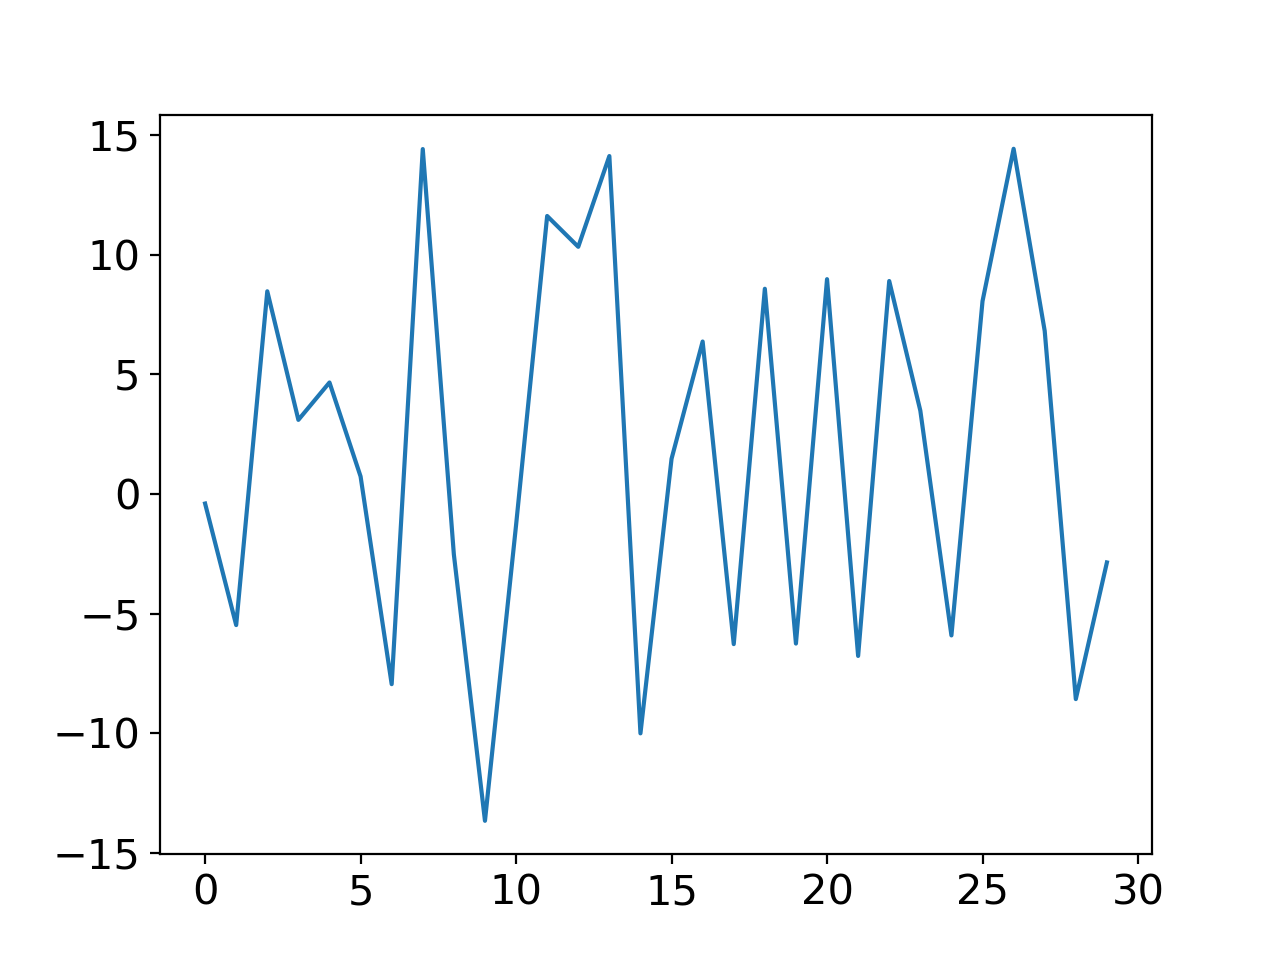

In [21]:
plt.figure()
plt.plot(highz_arr[320])
plt.show()

Yeah for sure, so the point of the encoder is to reduce the dimension of the spectra to something more manageable for T-sne to handle. Once we reduce the dimension what we would do is see where t-SNE plots them in 2-D space and then use gaussian mixture to label and separate them.
Once we have the groups sorted out using t-sne and gaussian mixture we then want to study the high-z sample further since this sample is the one that is most easily confused with noise. So we want to select the ones that the code calls high-z and then use that as a testing sample for your classifier that will go a step further and separate high-z and noise.
All that is to say that doing this method gives us a testing sample to test your noise classifier.
Once you have a good sample of high-z sources we then want to work on getting the noise classifier up and running. So for this we would want to select high-SN high-z sources lets go with SN > 6 and a high plya, say plya > .95, these will be our “True” high-z sources and then we can use the noise sample you generated to then separate these two groups. I believe you mentioned random forrest could be good with this so we can look in to how to do that.

In [23]:
labels1 = np.concatenate((1+np.zeros(433),3+np.zeros(444),2+np.zeros(837),np.zeros(254)))
#labels2 = np.concatenate((1+np.zeros(107),3+np.zeros(111),2+np.zeros(209),np.zeros(63)))
#labels = np.concatenate((labels1,labels2))
correct = 0
for i, lab in enumerate(labels1):
    if lab == yhat[i]:
        correct = correct + 1
accuracy = correct/len(labels1)

agn_correct = 0
for i, lab in enumerate(labels1):
    if lab == 3:
        if yhat[:][i] == 3:
            agn_correct = agn_correct + 1
            
agn_accuracy = agn_correct/(444)



print(f"Total acc: {accuracy}")
print(f"AGN acc: {agn_accuracy}")

IndexError: index 975 is out of bounds for axis 0 with size 975

In [25]:
labels_final = yhat[433+444+837+254:]
#labels_final = np.load("labels_z3.npy")
highz_index = np.where((labels_final == 0))
star_index = np.where((labels_final == 1))
agn_index = np.where((labels_final == 3))
lowz_index = np.where((labels_final == 2))
#np.save("labels_z3",labels_final)


In [26]:
highz_index

(array([], dtype=int64),)

In [27]:
spectra_final = fits.getdata("hetdex_z3_spec.fits")
wave = spectra_final["wavelength"][1]
def Norm_fits(data):
    new_data = []
    for spec in data:
        spec = spec/np.nanmax(spec)
        new_data.append(spec)
    return np.array(new_data)

def isNaN(num):
    return num != num

def remove_nan(file):
    for i in range(0,len(file)):
        for j in range(0,len(file[i])):
            if isNaN(file[i][j]):
                file[i][j]=0.00001
                

spectra_final = Norm_fits(spectra_final["spec"])
remove_nan(spectra_final)
spectra_final = spectra_final[:,88:1002]
spectra_final = Norm_fits(spectra_final)

FileNotFoundError: [Errno 2] No such file or directory: 'hetdex_z3_spec.fits'

In [4]:
a = np.load("decoded_final_final_z3.npy")

<IPython.core.display.Javascript object>


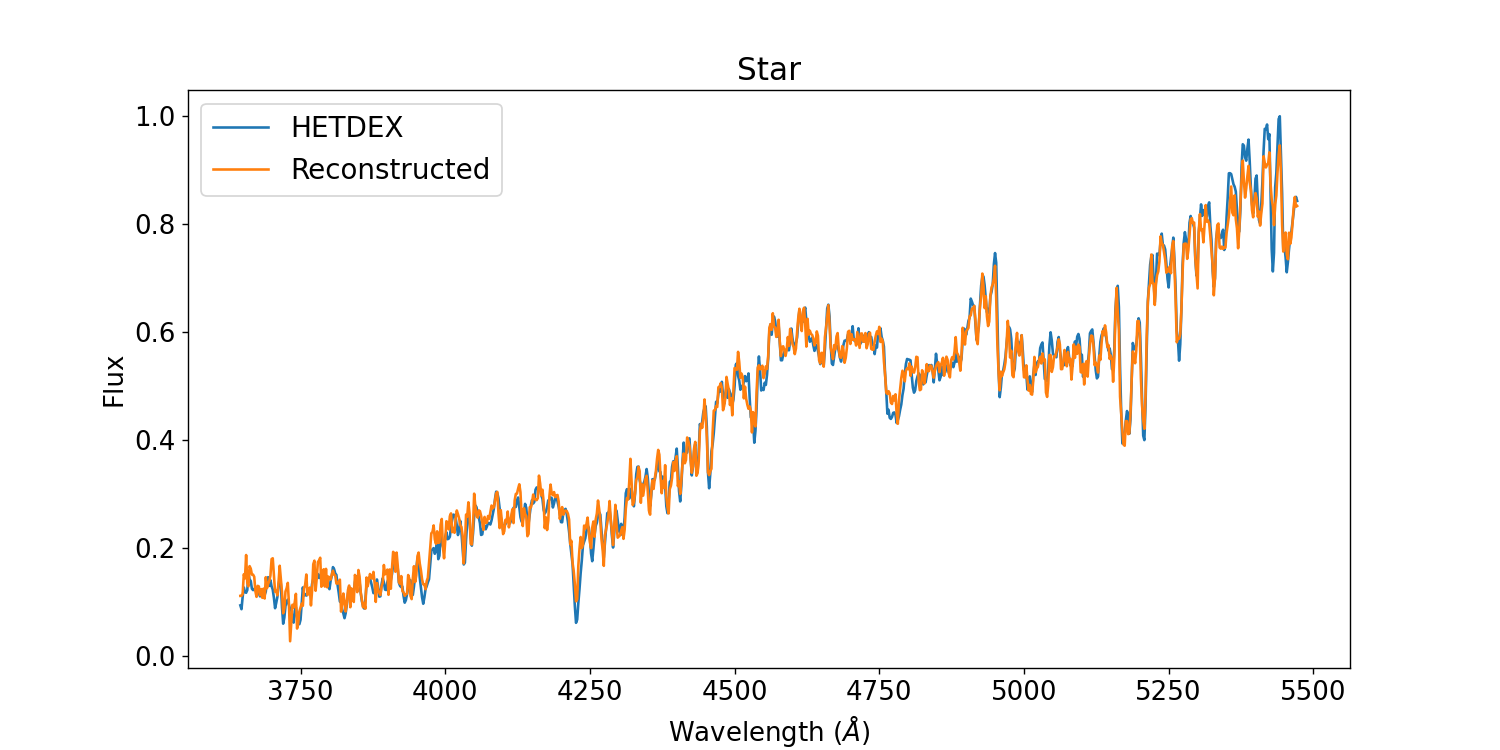

In [11]:

plt.figure(figsize=(12,6))
plt.plot(wave[88:1002],spectra_final[star_index[0][1]],color="tab:blue",label="HETDEX")
plt.plot(wave[88:1002],a[star_index[0][1]],color="tab:orange",label="Reconstructed")
plt.title("Star")
plt.ylabel("Flux")
plt.xlabel(r"Wavelength ($\AA$)")
plt.legend(prop={'size': 16})
#plt.savefig("Starz3.png")

<IPython.core.display.Javascript object>


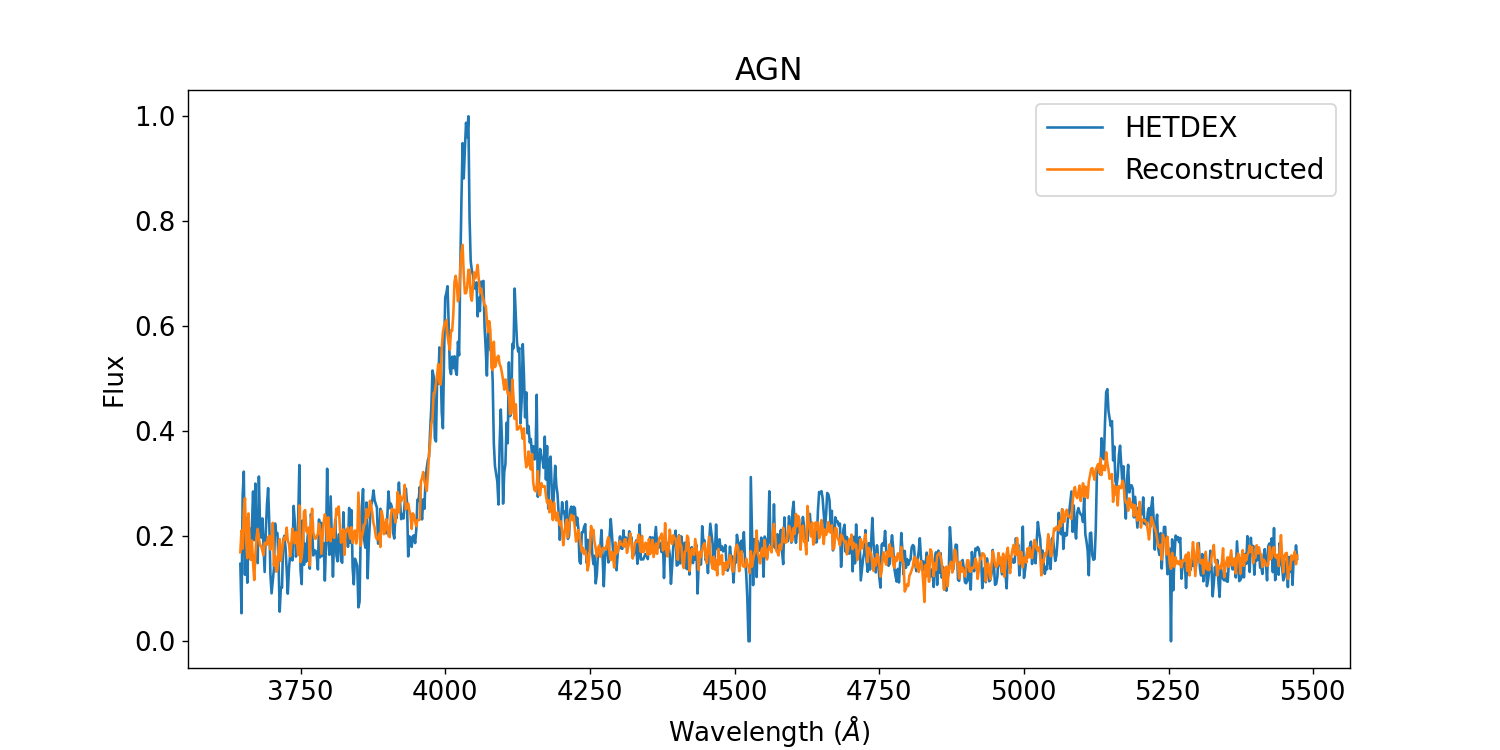

In [32]:

plt.figure(figsize=(12,6))
plt.plot(wave[88:1002],spectra_final[agn_index[0][46]],color="tab:blue",label="HETDEX")
plt.plot(wave[88:1002],a[agn_index[0][46]],color="tab:orange",label="Reconstructed")
plt.title("AGN")
plt.ylabel("Flux")
plt.xlabel(r"Wavelength ($\AA$)")
plt.legend(prop={'size': 16})
plt.savefig("agnz3.png")

<IPython.core.display.Javascript object>


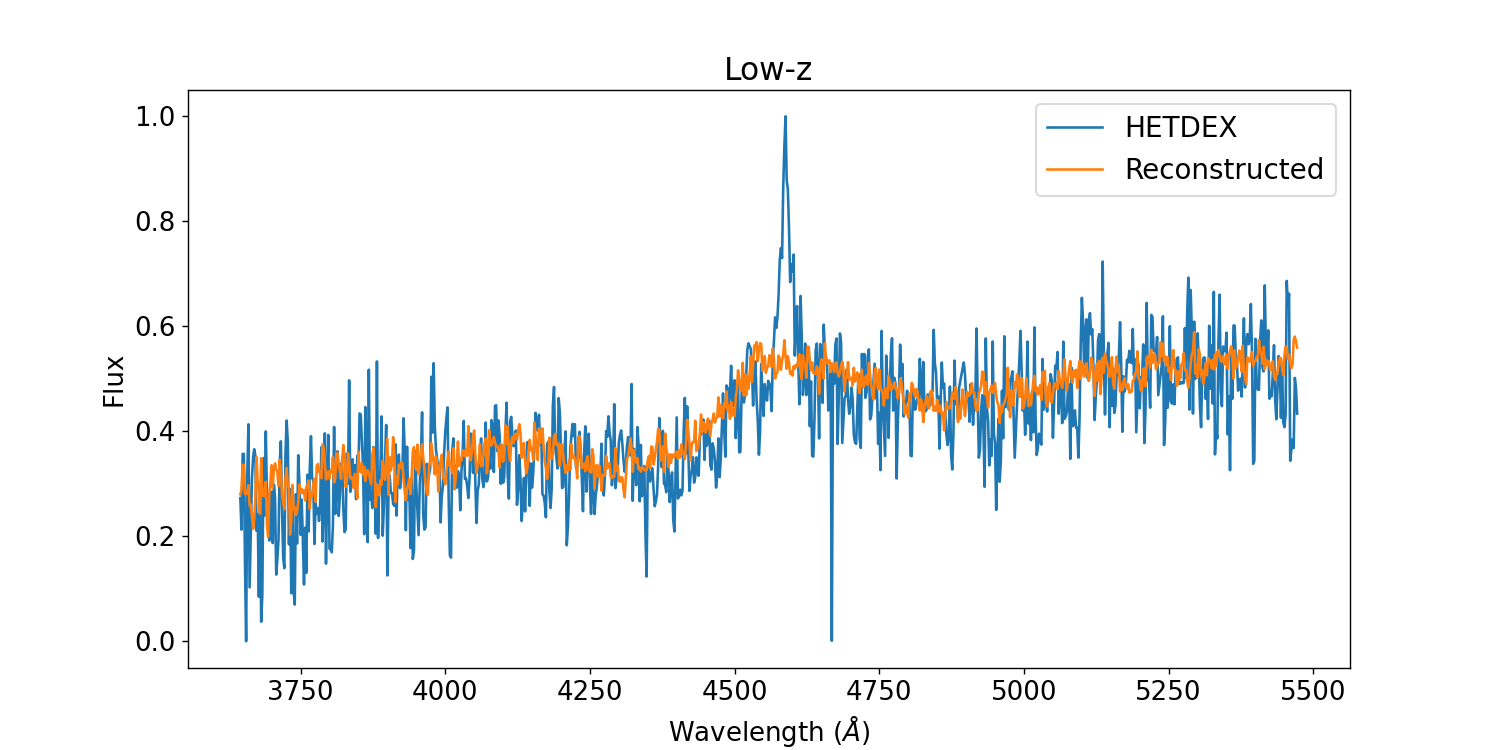

In [33]:
plt.figure(figsize=(12,6))
plt.plot(wave[88:1002],spectra_final[lowz_index[0][0]],color="tab:blue",label="HETDEX")
plt.plot(wave[88:1002],a[lowz_index[0][0]],color="tab:orange",label="Reconstructed")
plt.title("Low-z")
plt.ylabel("Flux")
plt.xlabel(r"Wavelength ($\AA$)")
plt.legend(prop={'size': 16})
plt.savefig("lowz3.png")

<IPython.core.display.Javascript object>


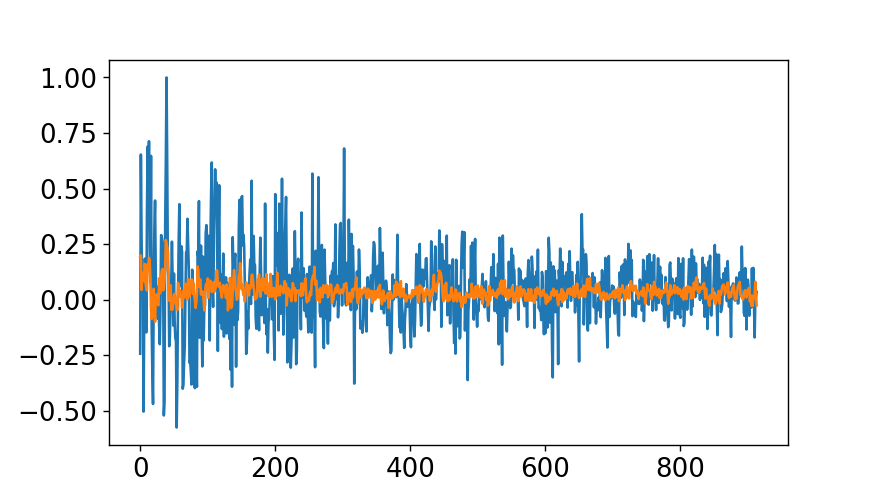

<IPython.core.display.Javascript object>


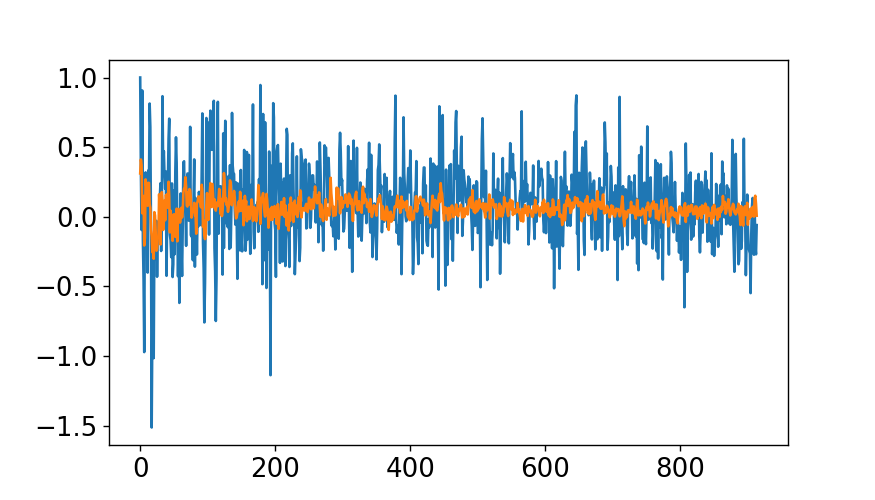

<IPython.core.display.Javascript object>


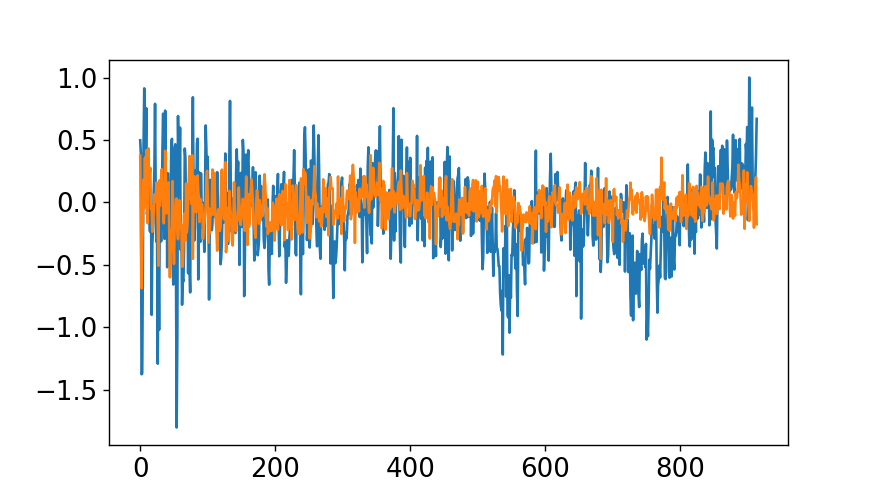

<IPython.core.display.Javascript object>


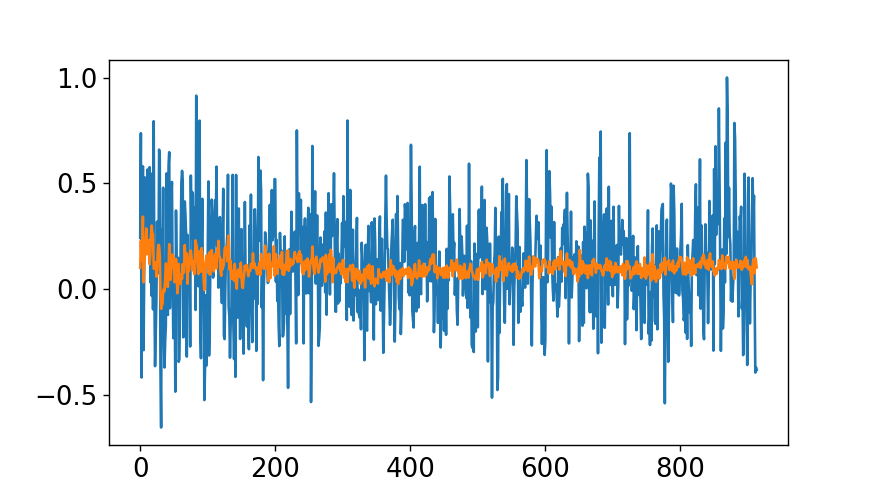

<IPython.core.display.Javascript object>


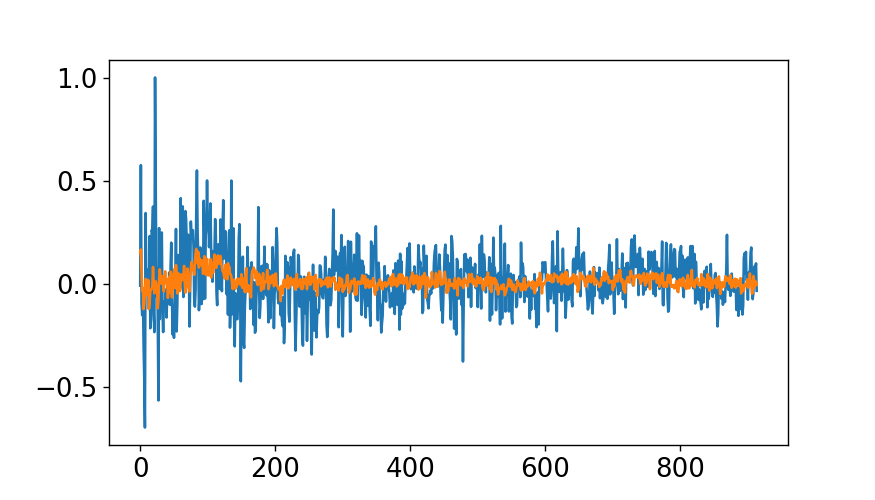

<IPython.core.display.Javascript object>


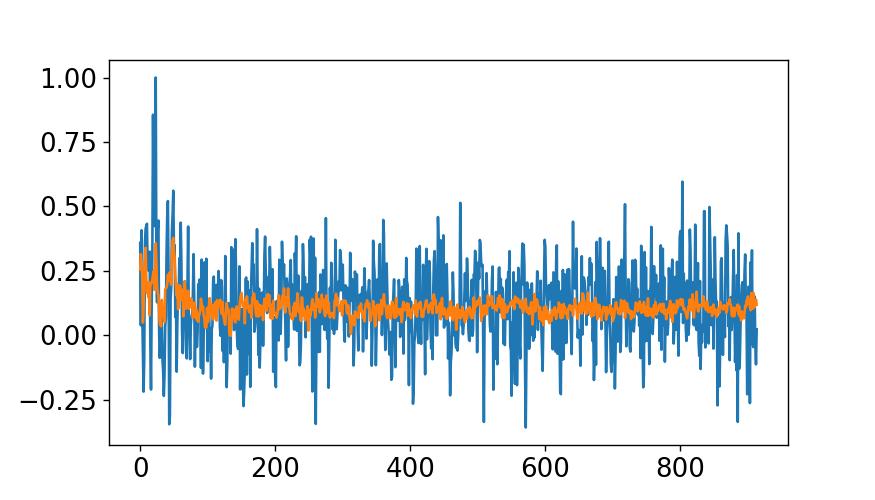

<IPython.core.display.Javascript object>


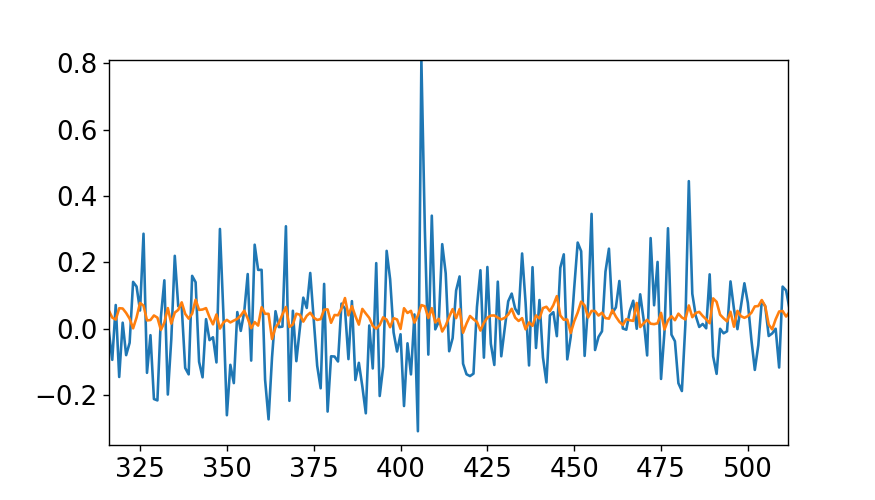

<IPython.core.display.Javascript object>


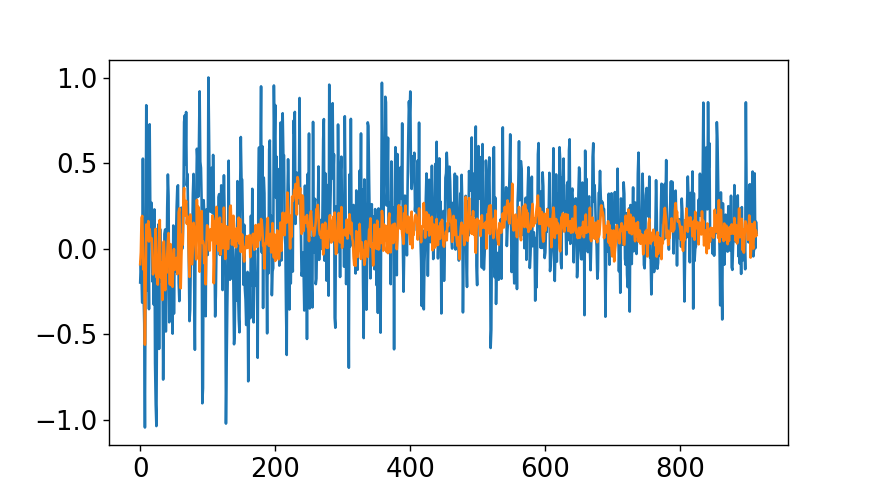

<IPython.core.display.Javascript object>


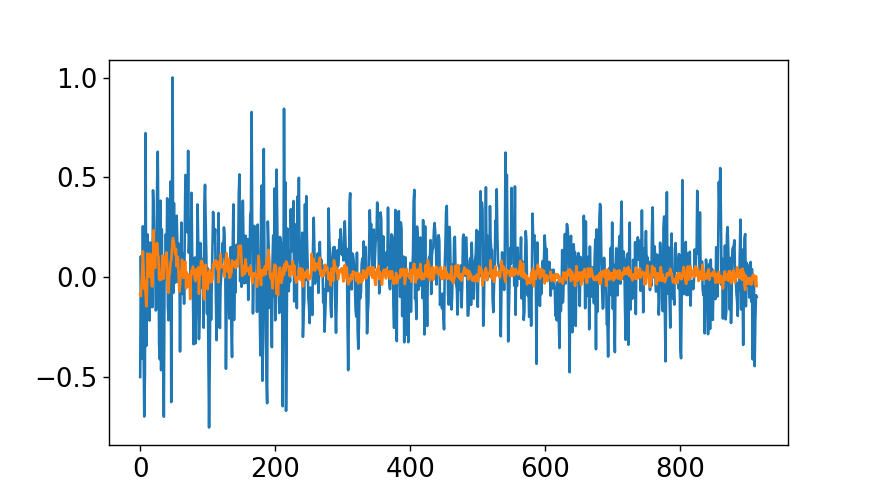

<IPython.core.display.Javascript object>


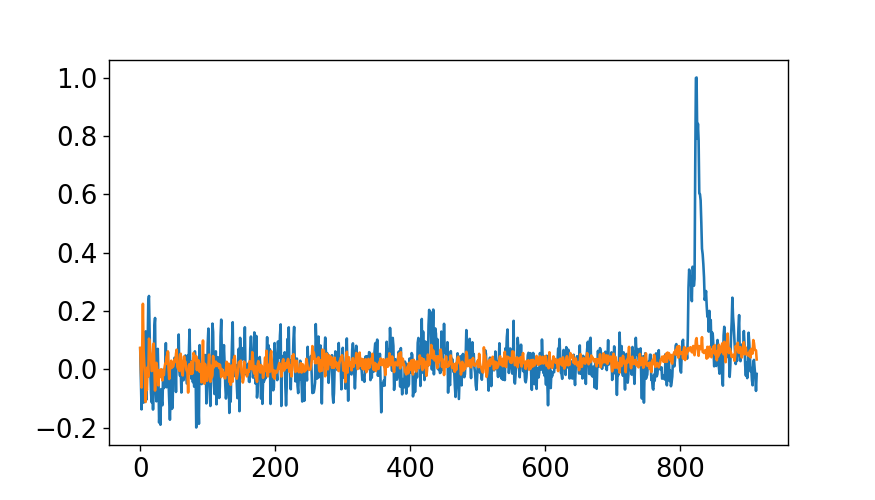

In [15]:
for i in highz_index[0][10:20]:
    plt.figure(figsize=(7,4))
    plt.plot(spectra_final[i])
    plt.plot(a[i])

In [74]:
len(lowz_index[0])

100

<IPython.core.display.Javascript object>


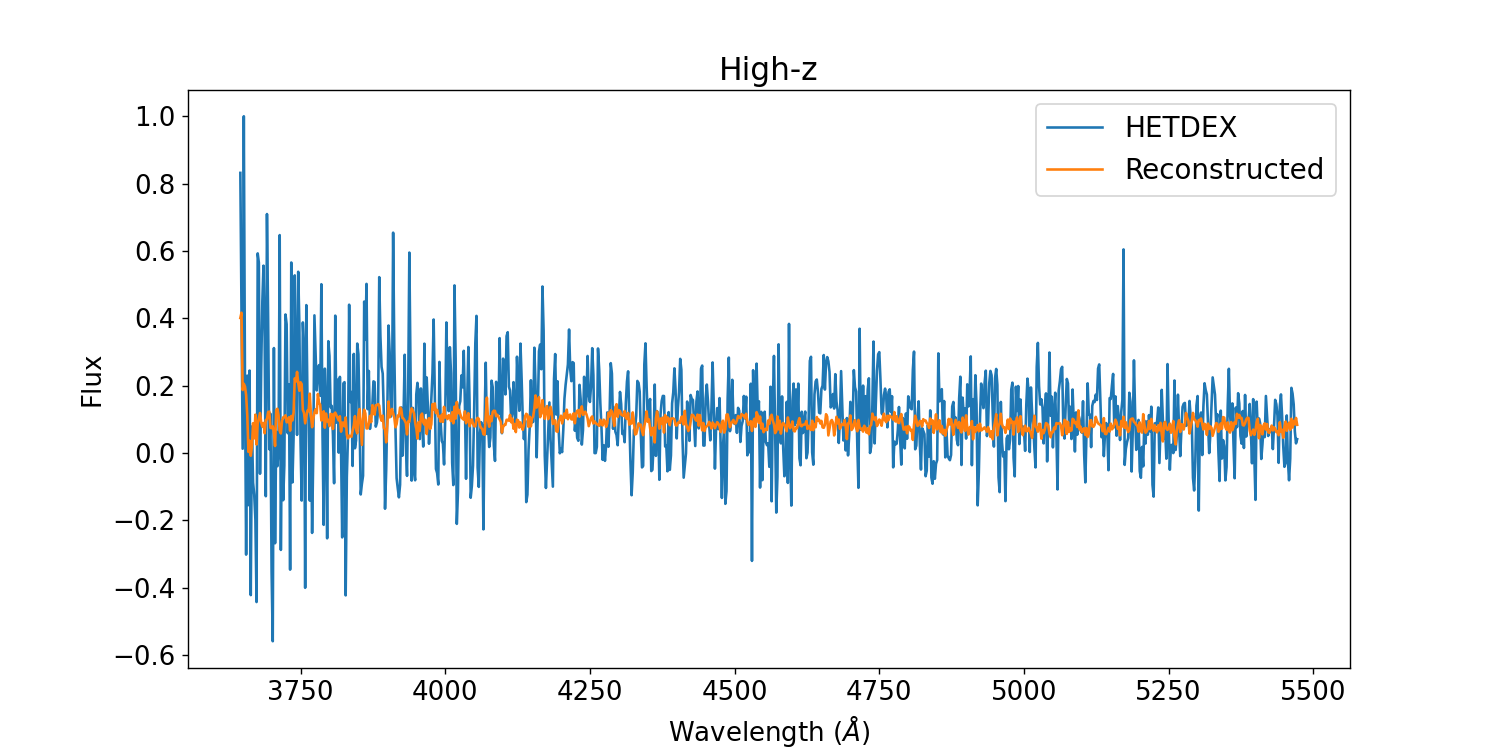

In [34]:
plt.figure(figsize=(12,6))
plt.plot(wave[88:1002],spectra_final[highz_index[0][7]],color="tab:blue",label="HETDEX")
plt.plot(wave[88:1002],a[highz_index[0][7]],color="tab:orange",label="Reconstructed")
plt.title("High-z")
plt.ylabel("Flux")
plt.xlabel(r"Wavelength ($\AA$)")
plt.legend(prop={'size': 16})
plt.savefig("highz3.png")

In [95]:
import sklearn

labels = np.concatenate((1+np.zeros(433),3+np.zeros(444),2+np.zeros(837),np.zeros(254)))

sklearn.metrics.confusion_matrix(labels,yhat[:433+444+837+254:])

array([[247,   0,   5,   2],
       [  7, 337,  31,  58],
       [ 63,   3, 767,   4],
       [ 12,   2,  28, 402]])